# Network Intrusions Detection

Our primary goal is to develop a robust Intrusion Detection System employing advanced classification techniques. Our approach involves creating two distinct models: the first model serves as a Binomial classifier, determining the presence or absence of network attacks, while the second model operates as a Multinomial classifier, discerning the specific type of attack involved.

**Step 1: Setting up the work environment**

We are going to download the necessary packages for our work. We are going to view the dataset and check the datatypes.

In [2]:
#importing packages
from pandas import Series;  from numpy.random import randn
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np

import seaborn as sb
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from scipy import stats

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures


from sklearn.linear_model import Ridge

from datetime import datetime
from datetime import date
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.metrics import accuracy_score, make_scorer

from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing as preproc
from sklearn import metrics
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

   

from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve as skm


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 


In [3]:
#getting the dataset
nid=pd.read_csv("C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\Network intrusion detection\\networkintrusionfile.csv")
nid.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
#examining the dataset
nid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7    wrong_fragment              148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12   num_compromised             148517 non-null  int64  
 13 

In [5]:
#examining the dataset
nid.shape

(148517, 43)

**Step 2: Data cleaning**

In this step, we are going to clean our dataset. We are going to look for null values and replace them with mean and mode. 
We are going to modify some variables if it is necessary and change datatypes for better analysis. We will also remove outliers from the dataset.  Outliers hamper the machine learning algorithms and hence they have to be removed.

In [6]:
# column name cleaning

nid.columns = nid.columns.str.replace(' ', '')
nid.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [7]:
#checking null values 
nid.isna().sum(axis=0)

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
#function to handle outliers



def handle_extreme_values_iqr(data, variables, multiplier=1.5):
    
    modified_data = data.copy()
    
    for variable in variables:
        Q1 = data[variable].quantile(0.25)
        Q3 = data[variable].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
       
        modified_data[variable] = data[variable].apply(lambda x: x if lower_bound <= x <= upper_bound else data[variable].median())
    
    return modified_data


In [11]:
#handling outliers for numerical variables

numerical_variables = [
    'duration',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]

nid = handle_extreme_values_iqr(nid, numerical_variables)
nid

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0.0,tcp,ftp_data,SF,491.0,0.0,0.0,0.0,0.0,0.0,...,0.17,0.03,0.00,0.00,0.00,0.00,0.0,0.0,normal,20
1,0.0,udp,other,SF,146.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.02,0.00,0.00,0.00,0.00,0.0,0.0,normal,15
2,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0,neptune,19
3,0.0,tcp,http,SF,232.0,0.0,0.0,0.0,0.0,0.0,...,1.00,0.00,0.03,0.00,0.03,0.01,0.0,0.0,normal,21
4,0.0,tcp,http,SF,199.0,420.0,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0.0,tcp,smtp,SF,44.0,333.0,0.0,0.0,0.0,0.0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.0,0.0,normal,21
148513,0.0,tcp,http,SF,317.0,938.0,0.0,0.0,0.0,0.0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.0,0.0,normal,21
148514,0.0,tcp,http,SF,44.0,0.0,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,back,15
148515,0.0,udp,domain_u,SF,42.0,42.0,0.0,0.0,0.0,0.0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.0,0.0,normal,21


In [16]:
#Dropping variables on basis of only zeros
for i in nid:
    print("non_Zeros in",i,':',(np.count_nonzero(nid[i])))



non_Zeros in duration : 0
non_Zeros in protocol_type : 148517
non_Zeros in service : 148517
non_Zeros in flag : 148517
non_Zeros in src_bytes : 91499
non_Zeros in dst_bytes : 44900
non_Zeros in land : 0
non_Zeros in wrong_fragment : 0
non_Zeros in urgent : 0
non_Zeros in hot : 0
non_Zeros in num_failed_logins : 0
non_Zeros in logged_in : 59821
non_Zeros in num_compromised : 0
non_Zeros in root_shell : 0
non_Zeros in su_attempted : 0
non_Zeros in num_root : 0
non_Zeros in num_file_creations : 0
non_Zeros in num_shells : 0
non_Zeros in num_access_files : 0
non_Zeros in num_outbound_cmds : 0
non_Zeros in is_host_login : 0
non_Zeros in is_guest_login : 0
non_Zeros in count : 148503
non_Zeros in srv_count : 148503
non_Zeros in serror_rate : 42494
non_Zeros in srv_serror_rate : 40132
non_Zeros in rerror_rate : 0
non_Zeros in srv_rerror_rate : 0
non_Zeros in same_srv_rate : 145007
non_Zeros in diff_srv_rate : 46603
non_Zeros in srv_diff_host_rate : 0
non_Zeros in dst_host_count : 148513
non_Z

In [17]:
#getting rid of the columns
cols=['land','wrong_fragment','hot','urgent','num_failed_logins','num_compromised','root_shell','su_attempted','num_root',
      'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login']

nid=nid.drop(columns=cols)
nid.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,2.0,2.0,0.0,...,0.17,0.03,0.00,0.0,0.00,0.00,0.0,0.0,normal,20
1,0.0,udp,other,SF,146.0,0.0,0,13.0,1.0,0.0,...,0.00,0.02,0.00,0.0,0.00,0.00,0.0,0.0,normal,15
2,0.0,tcp,private,S0,0.0,0.0,0,123.0,6.0,1.0,...,0.10,0.05,0.00,0.0,1.00,1.00,0.0,0.0,neptune,19
3,0.0,tcp,http,SF,232.0,0.0,1,5.0,5.0,0.2,...,1.00,0.00,0.03,0.0,0.03,0.01,0.0,0.0,normal,21
4,0.0,tcp,http,SF,199.0,420.0,1,30.0,32.0,0.0,...,1.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,normal,21


**Step 3:Exploratory Data Analysis**

We can explore the dataset to get some sample insights and get to know what is happening. Charts will be used to provide key insights. 

In [21]:
numerical_variables = [
    'duration',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]

cols_to_exclude = [
    'land',
    'wrong_fragment',
    'hot',
    'urgent',
    'num_failed_logins',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login'
]

final_variables = [var for var in numerical_variables if var not in cols_to_exclude]
final_variables 

['duration',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [23]:
# Calculate the correlation matrix

final_variables=nid[['duration',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']]
correlation_matrix = final_variables.corr()
correlation_matrix

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src_bytes,NaN,1.000000,0.385669,0.698602,-0.437473,0.084107,-0.440024,-0.438007,NaN,NaN,...,-0.299856,0.631525,0.606421,-0.522245,0.210870,0.250769,-0.444079,-0.441659,NaN,NaN
dst_bytes,NaN,0.385669,1.000000,0.461072,-0.263276,0.056207,-0.256300,-0.254244,NaN,NaN,...,-0.154682,0.364850,0.338405,-0.260260,0.113368,0.205785,-0.254070,-0.255100,NaN,NaN
logged_in,NaN,0.698602,0.461072,1.000000,-0.539342,0.021993,-0.466492,-0.464952,NaN,NaN,...,-0.385985,0.618150,0.598829,-0.453010,0.247196,0.374100,-0.465806,-0.468530,NaN,NaN
count,NaN,-0.437473,-0.263276,-0.539342,1.000000,0.203600,0.585111,0.582078,NaN,NaN,...,0.466393,-0.445502,-0.530469,0.546910,-0.255465,-0.231803,0.586803,0.592499,NaN,NaN
srv_count,NaN,0.084107,0.056207,0.021993,0.203600,1.000000,0.159321,0.159595,NaN,NaN,...,0.086334,0.116505,0.081265,-0.024236,-0.043776,-0.015739,0.156864,0.161776,NaN,NaN
serror_rate,NaN,-0.440024,-0.256300,-0.466492,0.585111,0.159321,1.000000,0.991507,NaN,NaN,...,0.357362,-0.526418,-0.588120,0.572490,-0.193183,-0.188498,0.974696,0.976030,NaN,NaN
srv_serror_rate,NaN,-0.438007,-0.254244,-0.464952,0.582078,0.159595,0.991507,1.000000,NaN,NaN,...,0.356156,-0.523985,-0.584992,0.571578,-0.193947,-0.188639,0.970802,0.981982,NaN,NaN
rerror_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
srv_rerror_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


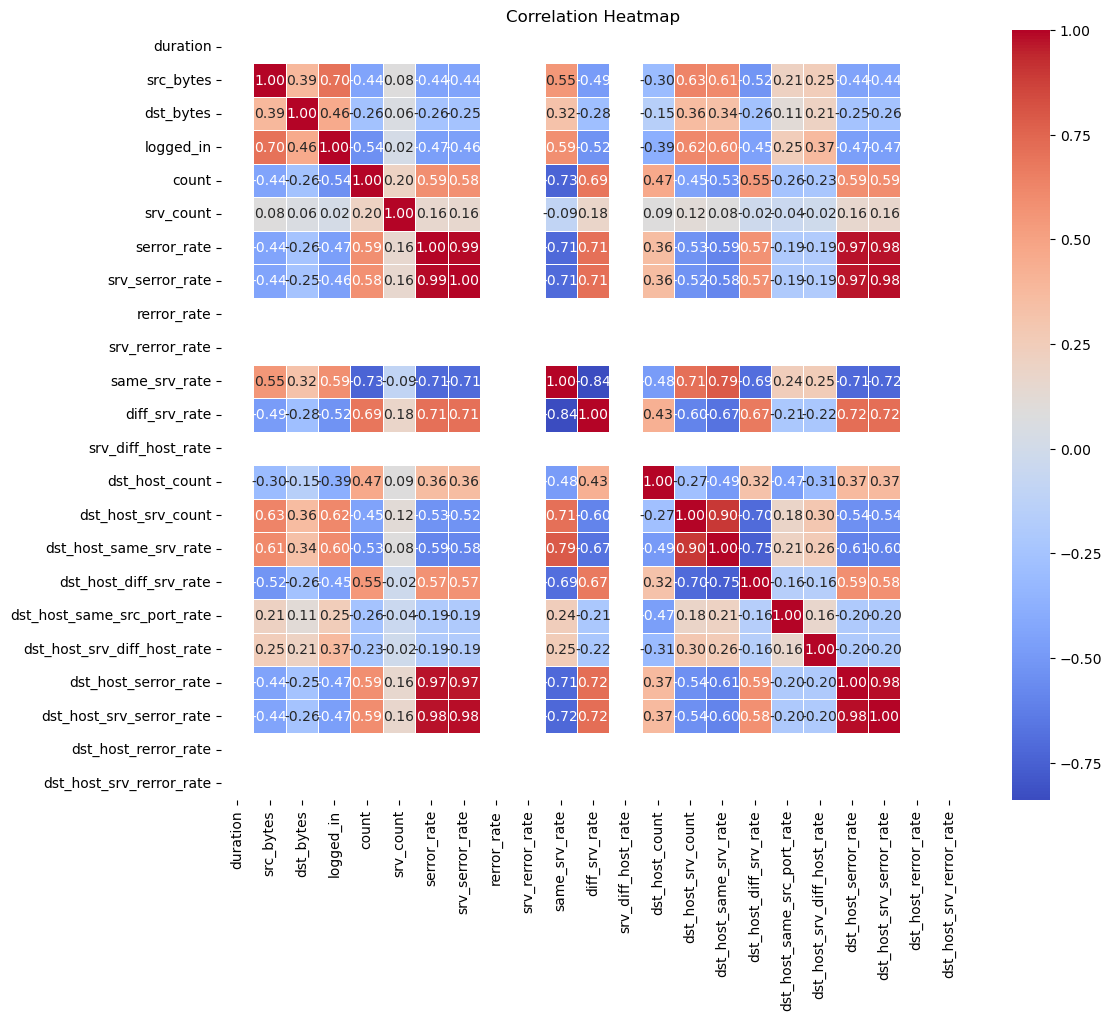

In [25]:
# Create a heatmap
plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
## there should be no relation between x variables
corr_x=nid.corr()
corr_x_x=corr_x.unstack().sort_values().drop_duplicates().reset_index()
corr_x_x=corr_x_x.loc[(corr_x_x[0]>0.90) | (corr_x_x[0]<-0.90)]['level_0'].drop_duplicates()
corr_x_x

147             srv_serror_rate
148                 serror_rate
151    dst_host_srv_serror_rate
153                   src_bytes
Name: level_0, dtype: object

In [27]:
# Dropping variables on basis of high correlation between independent variables
colss=['srv_serror_rate','src_bytes','dst_host_srv_serror_rate','serror_rate']
nid=nid.drop(columns=corr_x_x)
nid.head()

,duration,protocol_type,service,flag,dst_bytes,logged_in,count,srv_count,rerror_rate,srv_rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0.0,tcp,ftp_data,SF,0.0,0,2.0,2.0,0.0,0.0,...,25,0.17,0.03,0.00,0.0,0.00,0.0,0.0,normal,20
1,0.0,udp,other,SF,0.0,0,13.0,1.0,0.0,0.0,...,1,0.00,0.02,0.00,0.0,0.00,0.0,0.0,normal,15
2,0.0,tcp,private,S0,0.0,0,123.0,6.0,0.0,0.0,...,26,0.10,0.05,0.00,0.0,1.00,0.0,0.0,neptune,19
3,0.0,tcp,http,SF,0.0,1,5.0,5.0,0.0,0.0,...,255,1.00,0.00,0.03,0.0,0.03,0.0,0.0,normal,21
4,0.0,tcp,http,SF,420.0,1,30.0,32.0,0.0,0.0,...,255,1.00,0.00,0.00,0.0,0.00,0.0,0.0,normal,21


<AxesSubplot: >

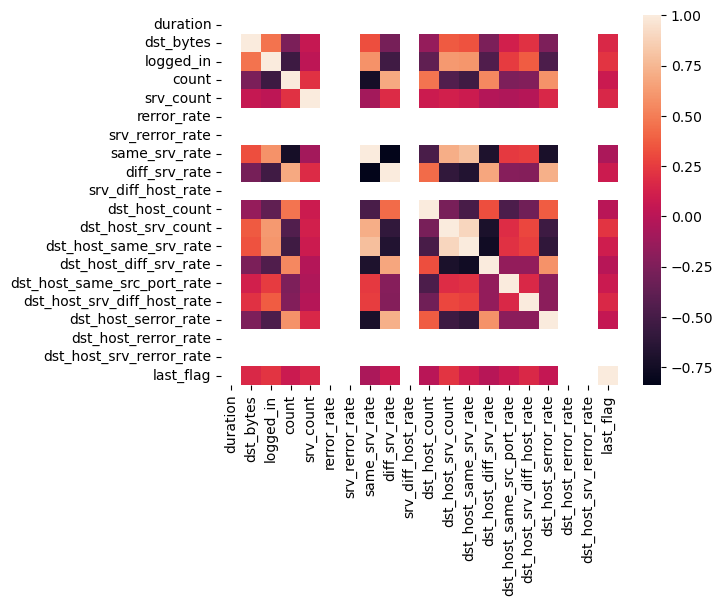

In [28]:
#seeing new corrplot
sb.heatmap(nid.corr())

**Step 5: Data pre-processing**

Here we are going to modify the variable values so that they can be fitted properly into the model. The categorical variables will be encoded and the numerical variables will be scaled. 


In [37]:
data= ['duration',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']
fs=nid.copy()

for x in data:
    fs.loc[(fs[x] <= fs[x].quantile(0.25)), x]=0
    fs.loc[(fs[x] > fs[x].quantile(0.25)) & (fs[x]<= fs[x].quantile(0.50)), x]=1
    fs.loc[(fs[x] > fs[x].quantile(0.50)) & (fs[x]<= fs[x].quantile(0.75)), x]=2
    fs.loc[(fs[x] > fs[x].quantile(0.75)) & (fs[x]<= fs[x].quantile(0.95)), x]=3
    fs.loc[(fs[x] > fs[x].quantile(0.95)), x]=4
    
nid=fs.copy()

In [38]:
#examining the data
nid.head()


,duration,protocol_type,service,flag,dst_bytes,logged_in,count,srv_count,rerror_rate,srv_rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0.0,tcp,ftp_data,SF,0.0,0,0.0,0.0,0.0,0.0,...,1,1.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,20
1,0.0,udp,other,SF,0.0,0,1.0,0.0,0.0,0.0,...,0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal,15
2,0.0,tcp,private,S0,0.0,0,2.0,1.0,0.0,0.0,...,1,1.0,0.05,0.0,0.0,1.0,0.0,0.0,neptune,19
3,0.0,tcp,http,SF,0.0,2,1.0,1.0,0.0,0.0,...,2,1.0,0.00,3.0,0.0,3.0,0.0,0.0,normal,21
4,0.0,tcp,http,SF,3.0,2,2.0,4.0,0.0,0.0,...,2,1.0,0.00,0.0,0.0,0.0,0.0,0.0,normal,21


In [39]:
#creating the function
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname], prefix=colname,drop_first=True)
    df=pd.concat([df,col_dummies], axis=1)
    df.drop(colname, axis=1, inplace=True)
    return df

In [42]:
#creating dummy variables
for c_feature in ['protocol_type','flag','service']:
    nid[c_feature]=nid[c_feature].astype('object')
    nid=create_dummies(nid,c_feature)

In [55]:
#examining the data
nid.head()

,duration,dst_bytes,logged_in,count,srv_count,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,Activity
0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,3.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.07,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,2,1.0,1.0,0.0,0.0,1.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,3.0,2,2.0,4.0,0.0,0.0,1.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#seeing types of attacks
nid.attack.unique()



array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [67]:
#modifying the variable
nid['attack']=np.where((train_data_cat.attack.isin (['neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'])==True), 1, 0 )


In [68]:
#seeing the unique variables
nid['attack'].unique()

array([0, 1])

In [69]:
#seeing the count of attacks vs normal
nid['attack'].value_counts()

0    80804
1    67713
Name: attack, dtype: int64

**Step 6: Model Building**

Now it is time to build a classification model that is going to use the independent variables to predict the target variable. We will build two type of models: Binomial(attack vs normal) and Multinomial(type of attack)

In [70]:
#selecting feature and target variables
X = nid.drop(columns=['attack']) 
y = nid['attack']  

In [71]:
# Splitting the data into training and testing data set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=42)

**Binomial Model**: We are going to use a logistic regression classifier to predict whether there is an attack or everything is normal.

In [73]:
#logistic regression classifier
lr = LogisticRegression()

In [74]:
#fitting the model 
lr.fit(X_train,y_train)

LogisticRegression()

In [76]:
#predict
ypred= lr.predict(X_test)
ypred

array([0, 0, 0, ..., 0, 1, 0])

In [77]:
#accuracy of the binomial model
print("Accuracy of the model: {0}%".format(accuracy_score(y_test,ypred)*100))

Accuracy of the model: 100.0%


In [79]:
#ROC AUC score 
roc_auc = roc_auc_score(y_test, ypred)
print("ROC AUC score: {0}".format(roc_auc))

ROC AUC score: 1.0


**Comment** 

We can clearly see this model has a 100% accuracy and can correctly predict each and every instance.

**Multinomial Model**: We are going to use a Decision tree classifier to predict whether there is an attack or everything is normal.

In [82]:
#recalling the dataset
nid=pd.read_csv("C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\Network intrusion detection\\networkintrusionfile.csv")
nid.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [84]:
#selecting feature and target variables
X = X 
y = nid['attack']  

In [85]:
#seeing unique values
y.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [86]:
#getting classifier

dct=DecisionTreeClassifier()

dct

DecisionTreeClassifier()

In [87]:
#initializing label encoder
le=LabelEncoder()
le

LabelEncoder()

In [88]:
#transforming target variable
y=le.fit_transform(y)
y

array([16, 16, 14, ...,  1, 16, 11])

In [89]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=1)

In [90]:
#fitting the model 
dct.fit(X_train,y_train)

DecisionTreeClassifier()

In [92]:
#predict
y_pred= dct.predict(X_test)
y_pred

array([16, 16, 16, ..., 16, 16, 16])

In [93]:

#accuracy
print("Accuracy of the model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of the model: 99.06813897118234%


**Comment** 

We can clearly see this model has an almost accuracy of 99.1% and can almost predict each and every class. 